# Microsoft Malware detection

`<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file 
</li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>



Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [60]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd

import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [5]:
#separating byte files and asm files 
import os
import shutil

#data_files = os.listdir(r"D:\data\bt")  
#for file in data_files:
#       if (file.endswith("bytes")):
           

#            shutil.move(r"D:/data/bt/"+ file,r"D:/data/bytes")

<h2>3.1. Distribution of malware classes in whole data set </h2>

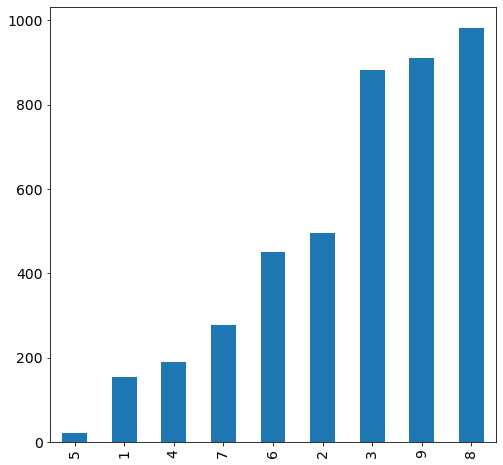

In [4]:
Y=pd.read_csv("D:\data/trainLabels1.csv")  # only 10% of the data is used according to the laptop configuration where 10% data is extracted from each class to manitain the proportion
                                           # This is about 40 GB data of the original 150 GB of ASM files
Y.Class.value_counts().sort_values().plot(kind='bar',  fontsize=14,  
                                               figsize=(8,8))
plt.show()

In [52]:
Y

,Id,Class
0,01kcPWA9K2BOxQeS5Rju,1
1,04EjIdbPV5e1XroFOpiN,1
2,05EeG39MTRrI6VY21DPd,1
3,05rJTUWYAKNegBk2wE8X,1
4,0AnoOZDNbPXIr2MRBSCJ,1
...,...,...
4358,iouyxgUJX7pjI1LBTSDF,9
4359,iPFa4r6moSNthpqB2RDV,9
4360,iPqeOav3fHD2VJrt9GoE,9
4361,iPtRTr5EZ4bQljzKXYcJ,9


<h2>3.2. Feature extraction </h2>

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [53]:
#file sizes of byte files

files=os.listdir(r'D:\data\bytes')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    statinfo=os.stat(r"D:/data/bytes/"+ file)
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())
    

                     ID      size  Class
0  01IsoiSMh5gxyDYTl4CB  6.556152      2
1  01jsnpXSAlgw6aPeDxrU  4.602051      9
2  01kcPWA9K2BOxQeS5Rju  0.679688      1
3  01SuzwMJEIXsK7A8dQbl  0.438965      8
4  02IOCvYEy8mjiuAQHax3  0.792969      6


In [18]:
data_size_byte.shape

(4362, 3)

In [55]:
Y.Id=Y.Id+'.bytes'
Y

,Id,Class
0,01kcPWA9K2BOxQeS5Rju.bytes,1
1,04EjIdbPV5e1XroFOpiN.bytes,1
2,05EeG39MTRrI6VY21DPd.bytes,1
3,05rJTUWYAKNegBk2wE8X.bytes,1
4,0AnoOZDNbPXIr2MRBSCJ.bytes,1
...,...,...
4358,iouyxgUJX7pjI1LBTSDF.bytes,9
4359,iPFa4r6moSNthpqB2RDV.bytes,9
4360,iPqeOav3fHD2VJrt9GoE.bytes,9
4361,iPtRTr5EZ4bQljzKXYcJ.bytes,9


<h3> 3.2.2 box plots of file size (.byte files) feature </h3>

<IPython.core.display.Javascript object>


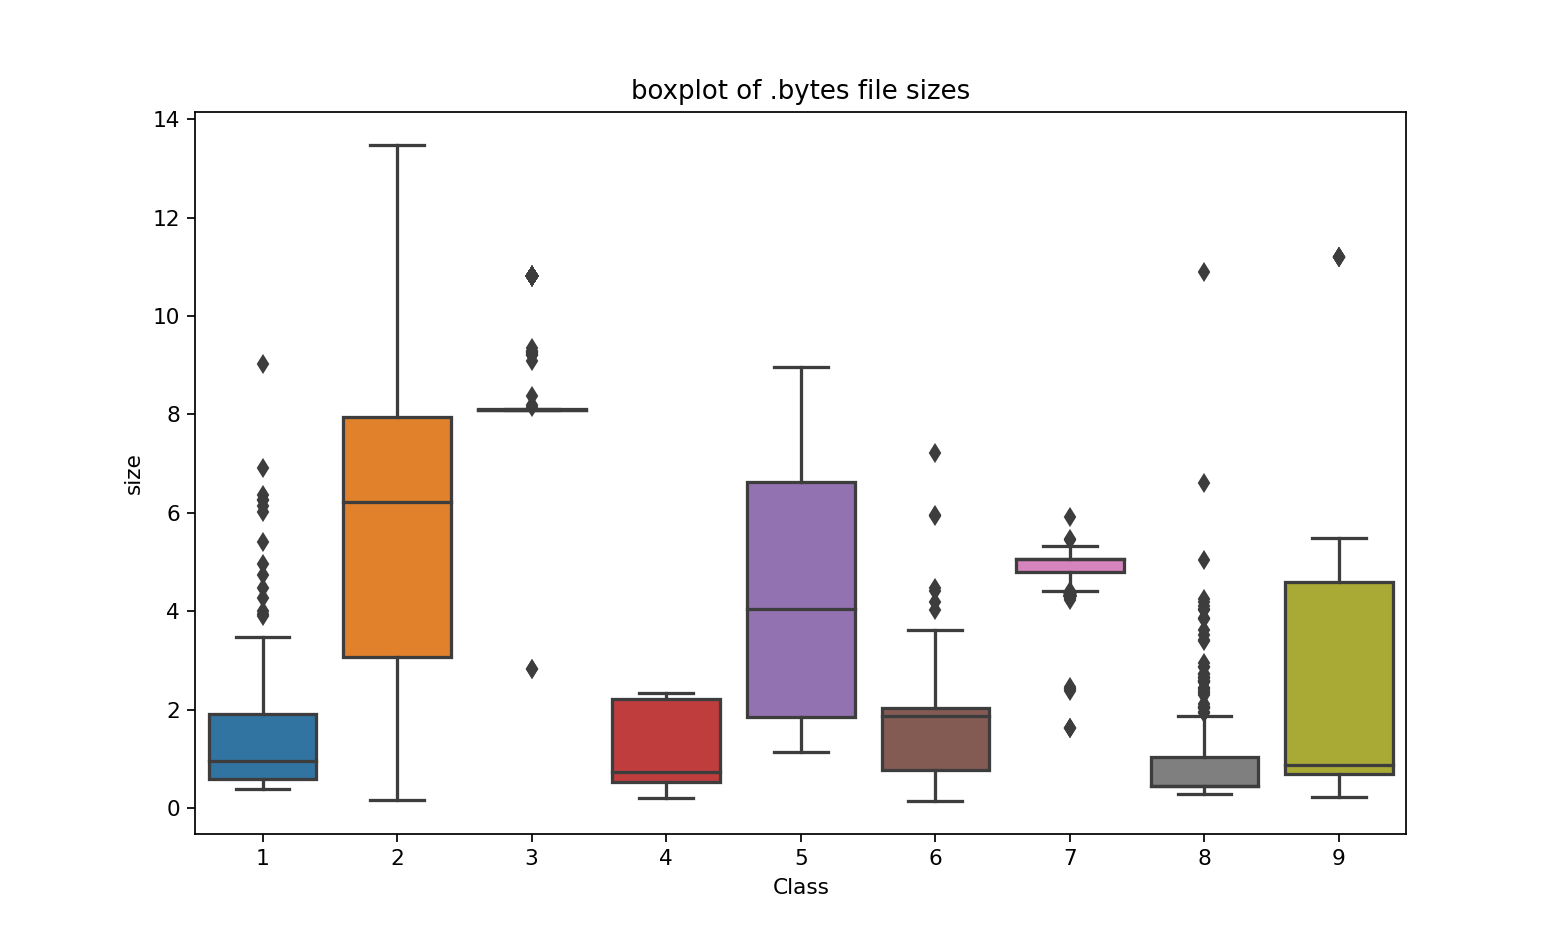

In [125]:
#boxplot of byte files
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [60]:
filenames=Y['Id'].tolist()
len(filenames)                 # finding all the files according to 10% data

4363

In [61]:
files=os.listdir(r'D:\data\bytes')  # checking all the files of original files
len(files)


10867

In [65]:
for file in files:
    if any(file == filename for filename in filenames):
        shutil.move(r"D:/data/bytes/"+ file,r"D:/data/bytes1")  # separating 10% data another file

In [86]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000
files = os.listdir(r'D:\data\bytes1')
filenames=[]
array=[]
for file in files:
    if(file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open(r'D:/data/bytes1/'+file+".txt", 'w+')
        with open(r'D:/data/bytes1/'+file+".bytes","r") as fp:
            for rec in fp:
                a=rec.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove(r'D:/data/bytes1/'+file+".bytes")
        text_file.close()

files = os.listdir(r'D:/data/bytes1')


In [87]:
files
filenames2=[]
feature_matrix = np.zeros((len(files),257),dtype=int)
k=0

In [89]:
#program to convert into bag of words of bytefiles
#this is custom-built bag of words this is unigram bag of words
byte_feature_file=open(r'D:\data\result.csv','w+')

In [97]:
byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
for file in files:
    filenames2.append(file)
    byte_feature_file.write(file+",")
    if(file.endswith("txt")):
        with open(r'D:/data/bytes1/'+file,"r") as byte_flie:
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for hex_code in line:
                    if hex_code=='??':
                        feature_matrix[k][256]+=1
                    else:
                        feature_matrix[k][int(hex_code,16)]+=1
        byte_flie.close()
    for i in feature_matrix[k]:
        byte_feature_file.write(str(i)+",")
    byte_feature_file.write("\n")
    
    k += 1

byte_feature_file.close()

In [107]:
byte_features=pd.read_csv(r"D:\data\result.csv")
print (byte_features.head())


                         ID      0      1      2      3       4      5      6  \
0  01jsnpXSAlgw6aPeDxrU.txt  93506   9542   2568   2438    8925   9330   9007   
1  01kcPWA9K2BOxQeS5Rju.txt  21091   1213    726    817    1257    625    550   
2  01SuzwMJEIXsK7A8dQbl.txt  19764    710    302    433     559    410    262   
3  02IOCvYEy8mjiuAQHax3.txt  85090    414    340    331     350    324    303   
4  02JqQ7H3yEoD8viYWlmS.txt  48412  22184  13818  14266  247579  15070  13053   

       7      8  ...    f7     f8    f9    fa    fb     fc    fd     fe  \
0   2342   9107  ...  2325   2358  2242  2885  2863   2471  2786   2680   
1    523   1078  ...   478    873   485   462   516   1133   471    761   
2    249    422  ...   847    947   350   209   239    653   221    242   
3    299    327  ...   317    305   295   333   344    325   332    321   
4  13015  10814  ...   365  19073   232   154   198  13345   367  14503   

      ff   ??ID  
0  49144    468  
1   7998  13940  
2   2199

<h3> 3.2.3 File size  of selected byte files as a feature </h3>

In [108]:
files=os.listdir(r'D:\data\bytes2')
Y=pd.read_csv("D:\data/trainLabels1.csv") 
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    statinfo=os.stat(r"D:/data/bytes2/"+ file)
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})

data_size_byte.ID= data_size_byte.ID+'.txt'
print (data_size_byte.head())

                         ID      size  Class
0  01IsoiSMh5gxyDYTl4CB.txt  6.556152      2
1  01jsnpXSAlgw6aPeDxrU.txt  4.602051      9
2  01kcPWA9K2BOxQeS5Rju.txt  0.679688      1
3  01SuzwMJEIXsK7A8dQbl.txt  0.438965      8
4  02IOCvYEy8mjiuAQHax3.txt  0.792969      6


In [109]:
result = pd.merge(byte_features, data_size_byte,on='ID', how='left')
result.head()

,ID,0,1,2,3,4,5,6,7,8,...,f9,fa,fb,fc,fd,fe,ff,??ID,size,Class
0,01jsnpXSAlgw6aPeDxrU.txt,93506,9542,2568,2438,8925,9330,9007,2342,9107,...,2242,2885,2863,2471,2786,2680,49144,468,4.602051,9
1,01kcPWA9K2BOxQeS5Rju.txt,21091,1213,726,817,1257,625,550,523,1078,...,485,462,516,1133,471,761,7998,13940,0.679688,1
2,01SuzwMJEIXsK7A8dQbl.txt,19764,710,302,433,559,410,262,249,422,...,350,209,239,653,221,242,2199,9008,0.438965,8
3,02IOCvYEy8mjiuAQHax3.txt,85090,414,340,331,350,324,303,299,327,...,295,333,344,325,332,321,403,60984,0.792969,6
4,02JqQ7H3yEoD8viYWlmS.txt,48412,22184,13818,14266,247579,15070,13053,13015,10814,...,232,154,198,13345,367,14503,58847,9648,8.425293,2


In [110]:
result.isnull().sum()

ID       0
0        0
1        0
2        0
3        0
        ..
fe       0
ff       0
??ID     0
size     0
Class    0
Length: 260, dtype: int64

In [111]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(result)

In [112]:
data_y = result['Class']
result.head()

,ID,0,1,2,3,4,5,6,7,8,...,f9,fa,fb,fc,fd,fe,ff,??ID,size,Class
0,01jsnpXSAlgw6aPeDxrU.txt,0.106411,0.025217,0.002541,0.004668,0.005454,0.005274,0.005077,0.005555,0.020524,...,0.011173,0.014235,0.013365,0.028389,0.015764,0.013891,0.185428,0.000201,0.334395,9
1,01kcPWA9K2BOxQeS5Rju.txt,0.023948,0.003080,0.000707,0.001539,0.000760,0.000347,0.000309,0.001239,0.002410,...,0.002417,0.002275,0.002409,0.012998,0.002665,0.003911,0.029852,0.005991,0.040340,1
2,01SuzwMJEIXsK7A8dQbl.txt,0.022437,0.001744,0.000285,0.000797,0.000332,0.000225,0.000147,0.000588,0.000930,...,0.001744,0.001027,0.001116,0.007477,0.001250,0.001212,0.007925,0.003871,0.022293,8
3,02IOCvYEy8mjiuAQHax3.txt,0.096828,0.000957,0.000323,0.000600,0.000204,0.000177,0.000170,0.000707,0.000715,...,0.001470,0.001639,0.001606,0.003704,0.001879,0.001623,0.001134,0.026210,0.048832,6
4,02JqQ7H3yEoD8viYWlmS.txt,0.055060,0.058817,0.013743,0.027503,0.151553,0.008522,0.007358,0.030880,0.024375,...,0.001156,0.000755,0.000924,0.153471,0.002077,0.075377,0.222116,0.004147,0.621019,2


<h3>3.2.4 Multivariate Analysis </h3>

<IPython.core.display.Javascript object>


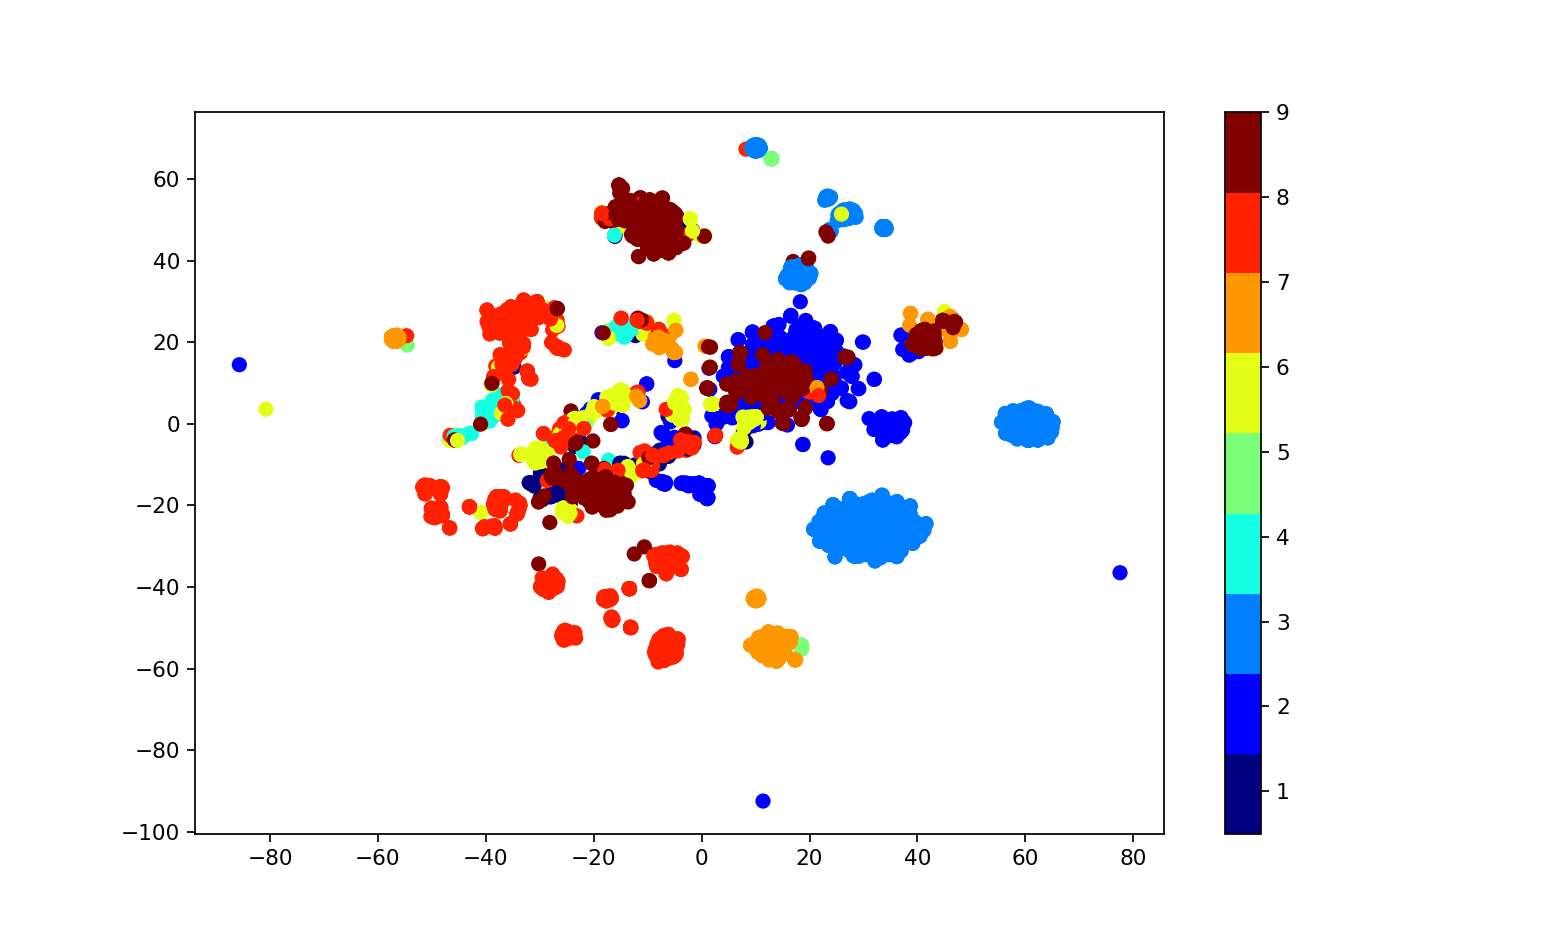

In [124]:

#multivariate analysis on byte files
#this is with perplexity 50
plt.figure(figsize=(10, 6))
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


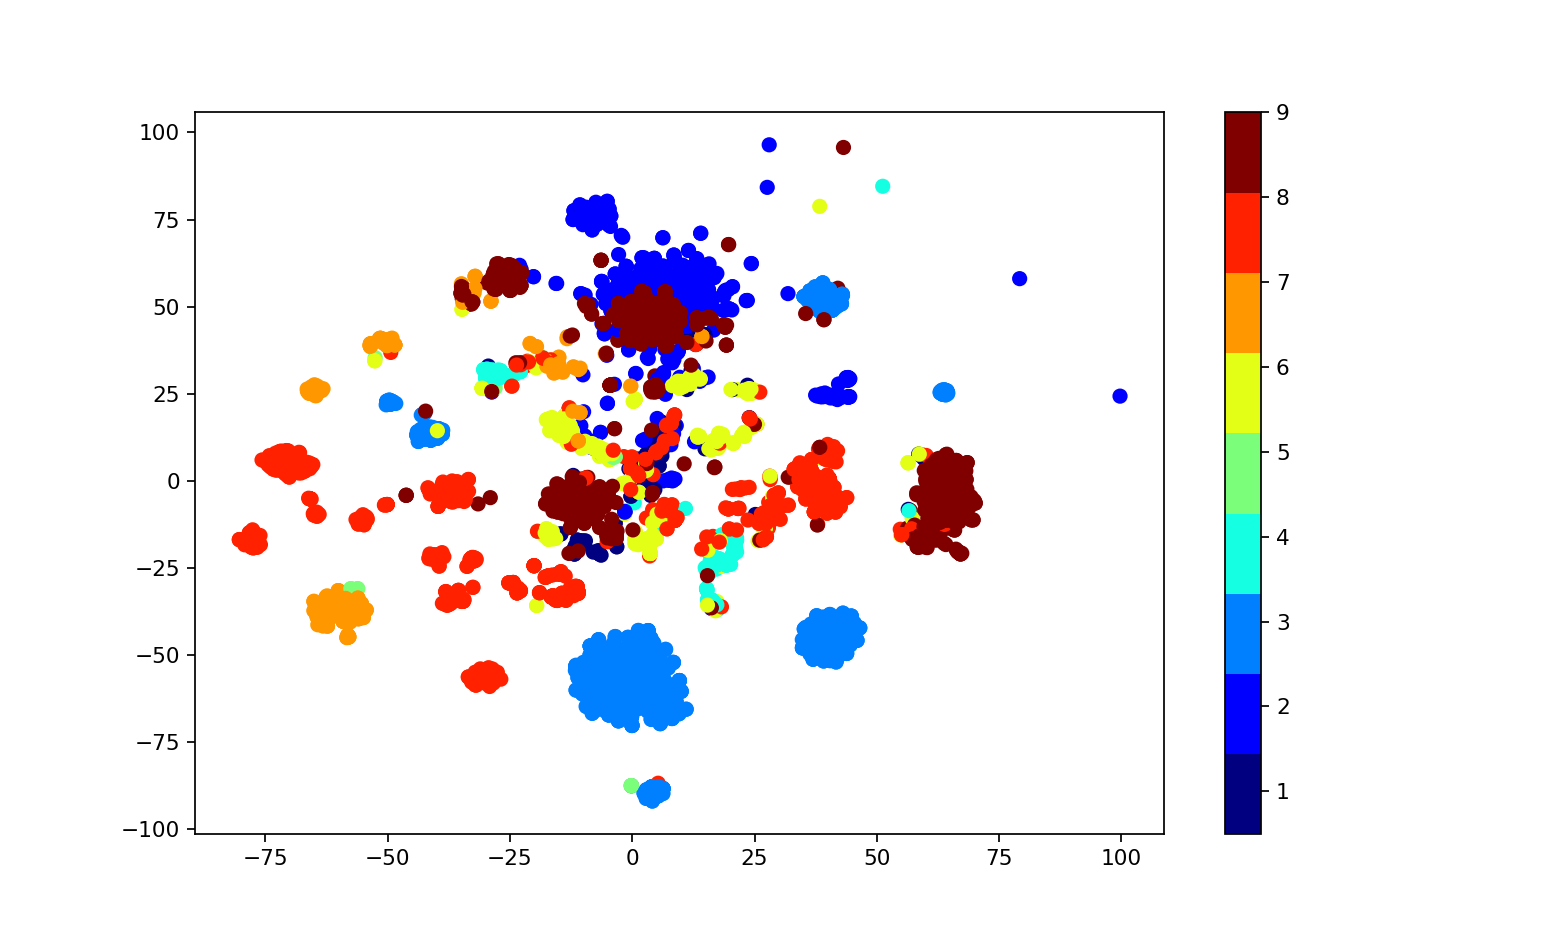

In [126]:
#this is with perplexity 30
plt.figure(figsize=(10, 6))
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Train Test split

In [11]:
data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result.drop(['ID','Class'], axis=1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [12]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 2790
Number of data points in test data: 873
Number of data points in cross validation data: 698


<IPython.core.display.Javascript object>


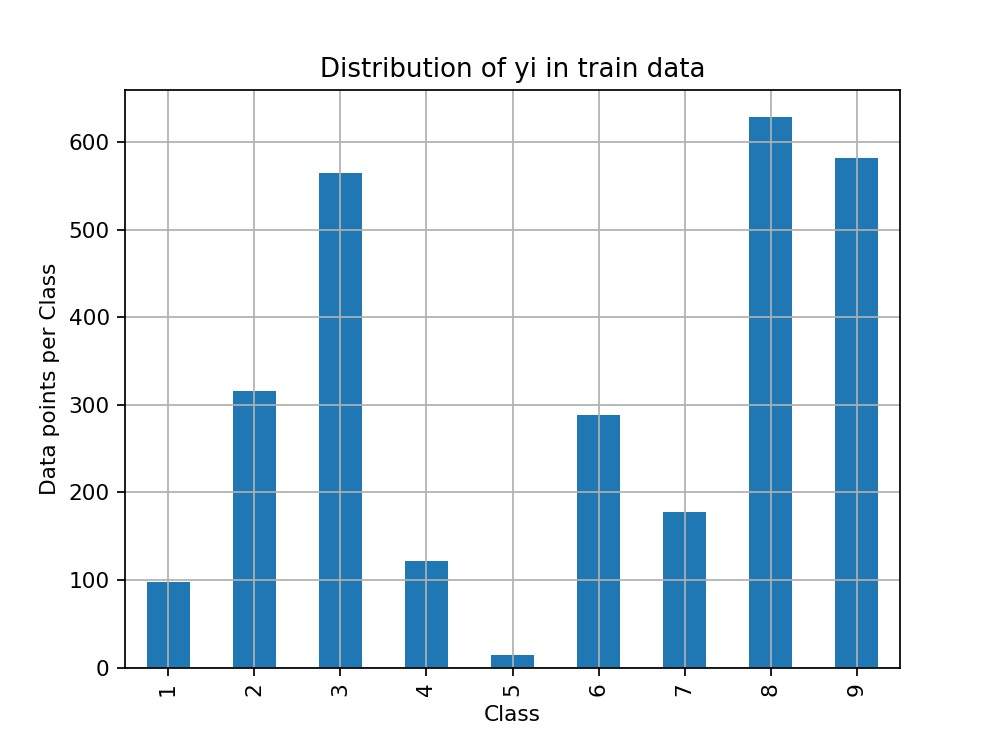

Number of data points in class 8 : 628 ( 22.509 %)
Number of data points in class 9 : 582 ( 20.86 %)
Number of data points in class 3 : 565 ( 20.251 %)
Number of data points in class 2 : 316 ( 11.326 %)
Number of data points in class 6 : 288 ( 10.323 %)
Number of data points in class 7 : 177 ( 6.344 %)
Number of data points in class 4 : 122 ( 4.373 %)
Number of data points in class 1 : 98 ( 3.513 %)
Number of data points in class 5 : 14 ( 0.502 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


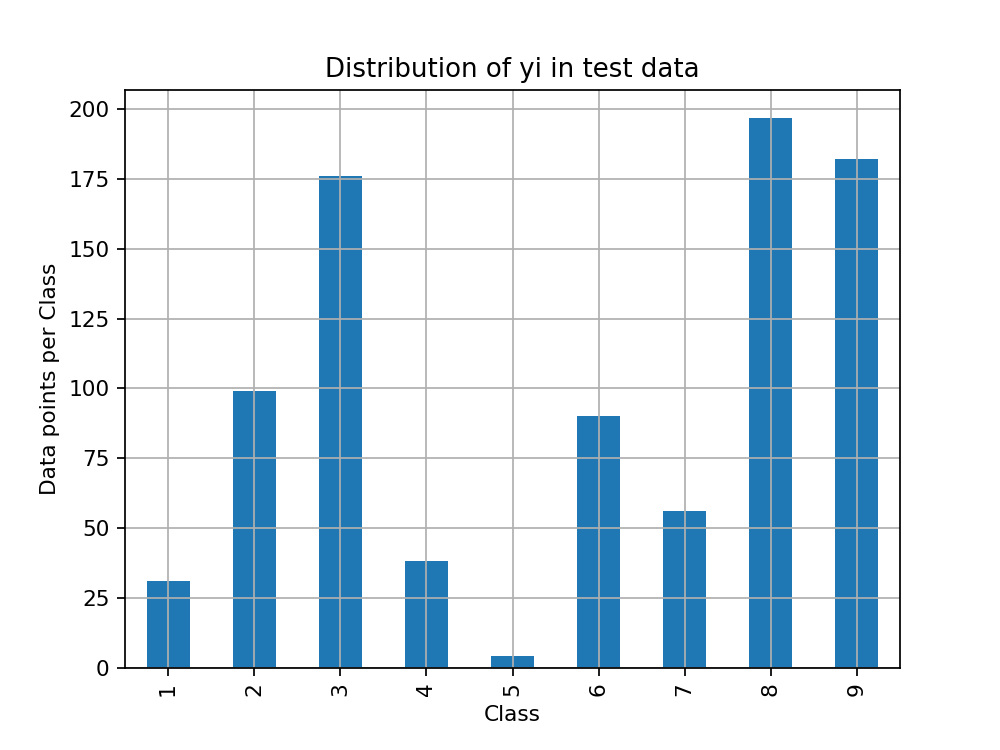

Number of data points in class 8 : 197 ( 22.566 %)
Number of data points in class 9 : 182 ( 20.848 %)
Number of data points in class 3 : 176 ( 20.16 %)
Number of data points in class 2 : 99 ( 11.34 %)
Number of data points in class 6 : 90 ( 10.309 %)
Number of data points in class 7 : 56 ( 6.415 %)
Number of data points in class 4 : 38 ( 4.353 %)
Number of data points in class 1 : 31 ( 3.551 %)
Number of data points in class 5 : 4 ( 0.458 %)


<IPython.core.display.Javascript object>


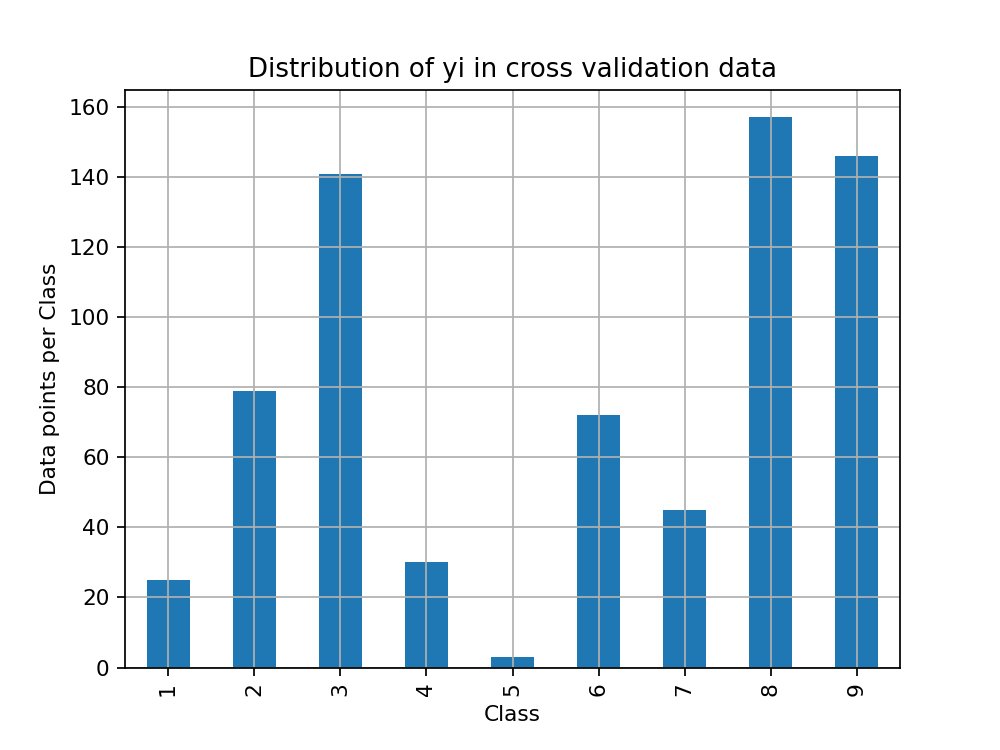

Number of data points in class 8 : 157 ( 22.493 %)
Number of data points in class 9 : 146 ( 20.917 %)
Number of data points in class 3 : 141 ( 20.201 %)
Number of data points in class 2 : 79 ( 11.318 %)
Number of data points in class 6 : 72 ( 10.315 %)
Number of data points in class 7 : 45 ( 6.447 %)
Number of data points in class 4 : 30 ( 4.298 %)
Number of data points in class 1 : 25 ( 3.582 %)
Number of data points in class 5 : 3 ( 0.43 %)


In [140]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sort_index()
test_class_distribution = y_test.value_counts().sort_index()
cv_class_distribution = y_cv.value_counts().sort_index()

train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()


# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*80)

test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()


# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')


my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()


# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [88]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h1>4. Machine Learning Models</h1>

<h2>4.1. Machine Leaning Models on bytes files</h2>

<h3>4.1.1. Random Model</h3>

Log loss on Cross Validation Data using Random Model 2.5349346011673184
Log loss on Test Data using Random Model 2.4610888623955547
Number of misclassified points  89.46162657502865
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


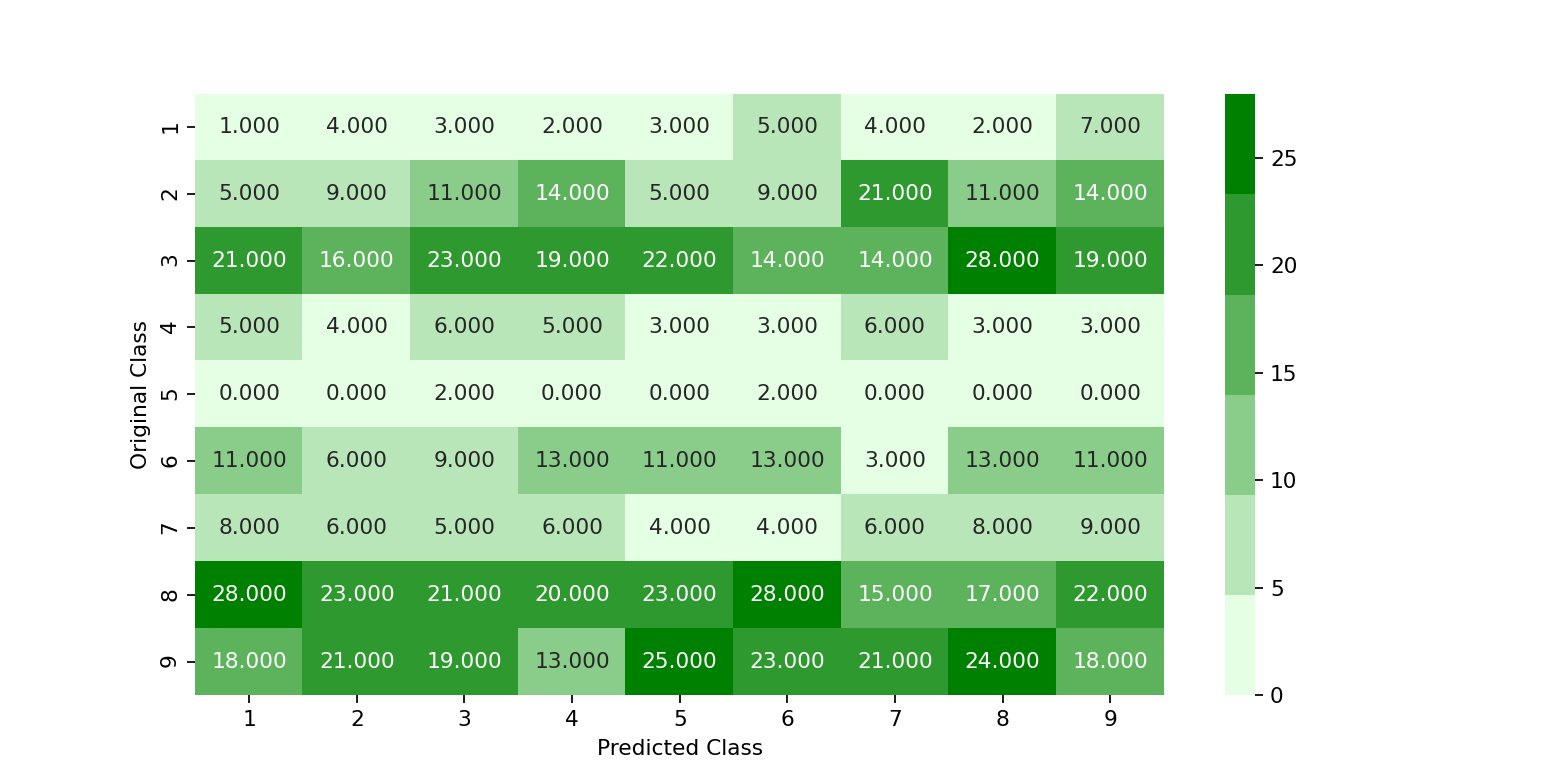

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


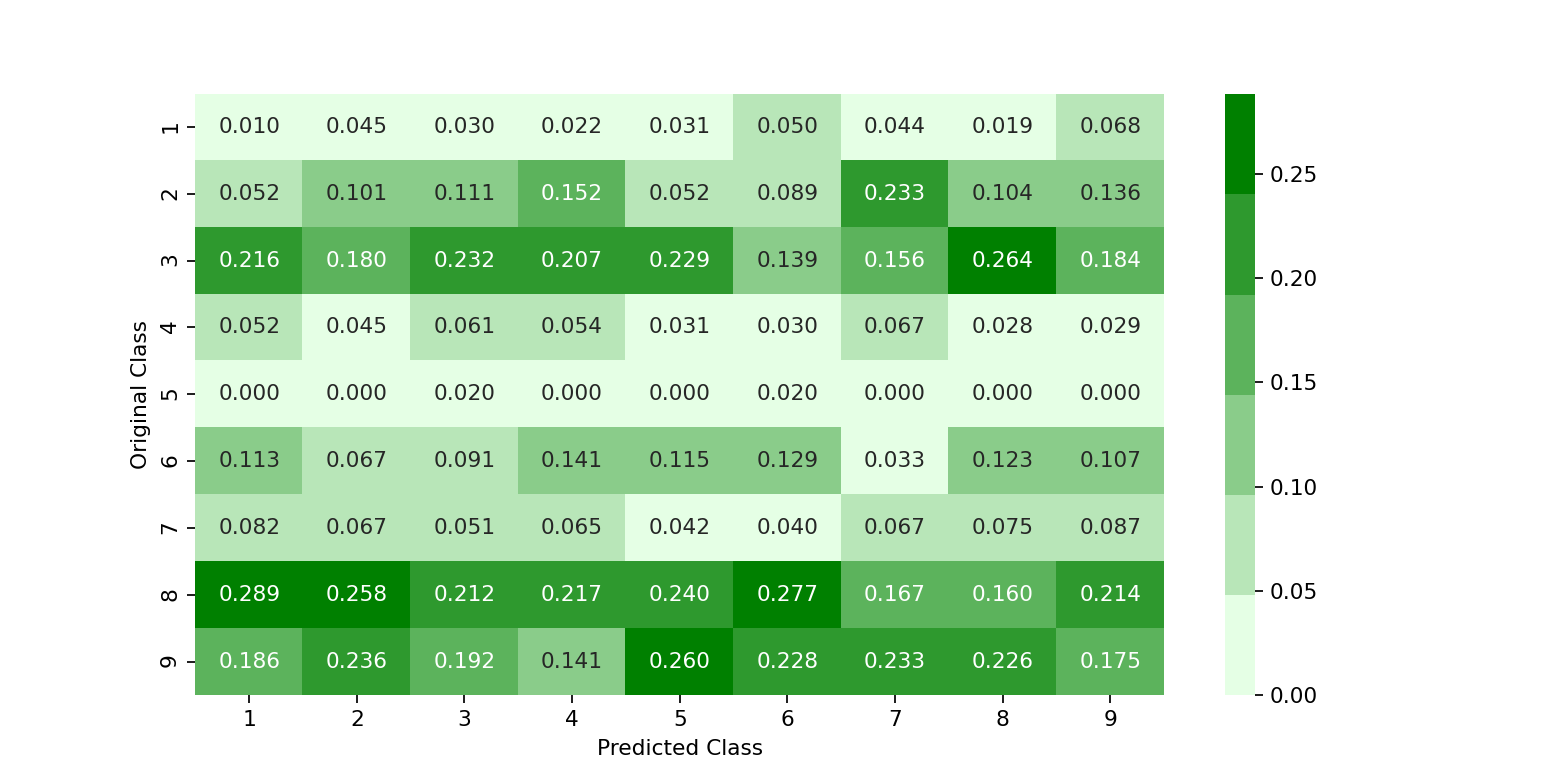

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


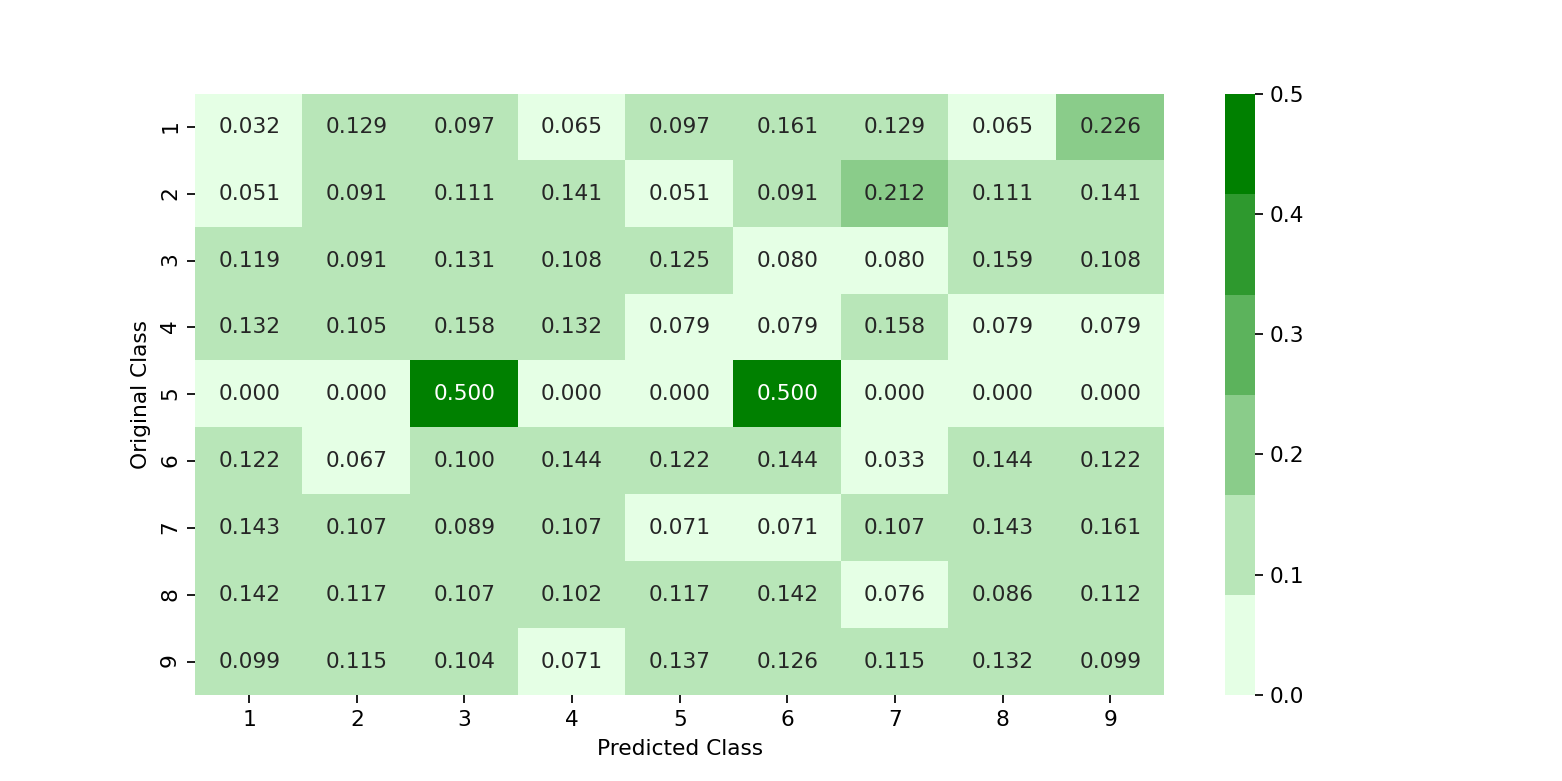

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [142]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h3>4.1.2. K Nearest Neighbour Classification</h3>

In [14]:
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)
# -------------------------


# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------

# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------

log_loss for k =  1 is 0.390696635816595
log_loss for k =  3 is 0.36477829055320926
log_loss for k =  5 is 0.3780789955551061
log_loss for k =  7 is 0.38870640548770985
log_loss for k =  9 is 0.400890166608688
log_loss for k =  11 is 0.41566559092631783
log_loss for k =  13 is 0.4269614309572095


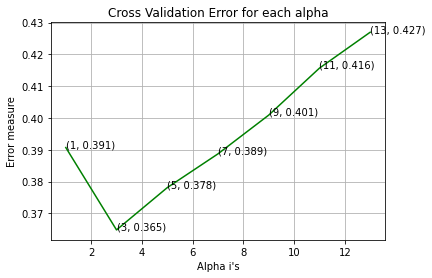

For values of best alpha =  3 The train log loss is: 0.1639127208217969
For values of best alpha =  3 The cross validation log loss is: 0.36477829055320926
For values of best alpha =  3 The test log loss is: 0.3291512779112226
Number of misclassified points  7.789232531500573
-------------------------------------------------- Confusion matrix --------------------------------------------------


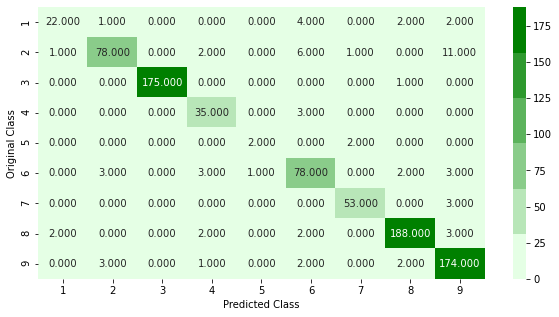

-------------------------------------------------- Precision matrix --------------------------------------------------


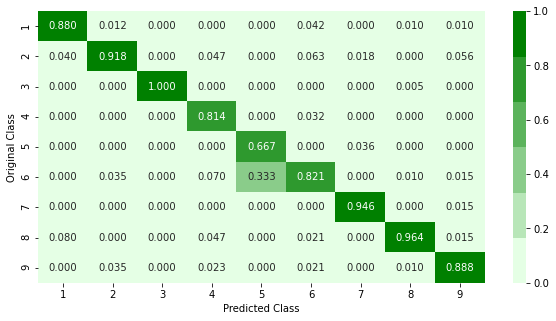

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


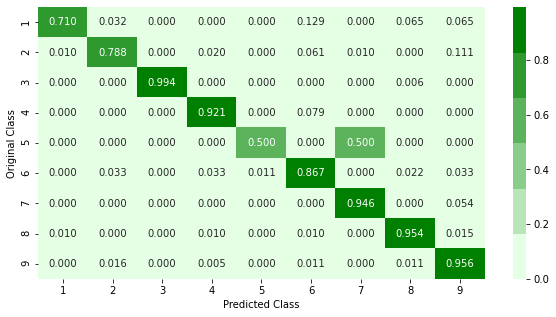

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.3. Logistic Regression</h3>

log_loss for c =  1e-05 is 1.0597119638892505
log_loss for c =  0.0001 is 1.0595887450915007
log_loss for c =  0.001 is 1.057819796307394
log_loss for c =  0.01 is 1.0439925103343337
log_loss for c =  0.1 is 1.0013892688631991
log_loss for c =  1 is 0.9037106980019546
log_loss for c =  10 is 0.8298956878485472
log_loss for c =  100 is 0.8587421588992636
log_loss for c =  1000 is 0.9570509980666759


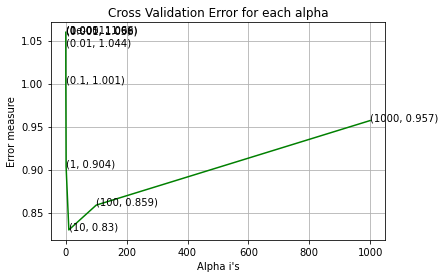

log loss for train data 0.8050288687222228
log loss for cv data 0.8298956878485472
log loss for test data 0.8474281163208304
Number of misclassified points  32.302405498281786
-------------------------------------------------- Confusion matrix --------------------------------------------------


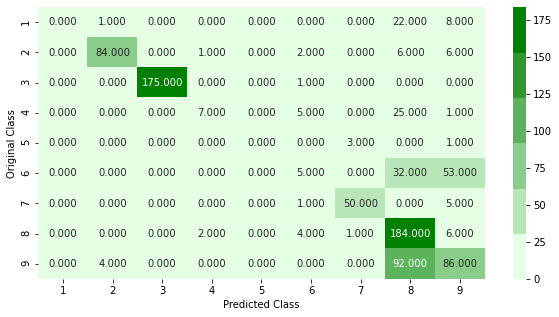

-------------------------------------------------- Precision matrix --------------------------------------------------


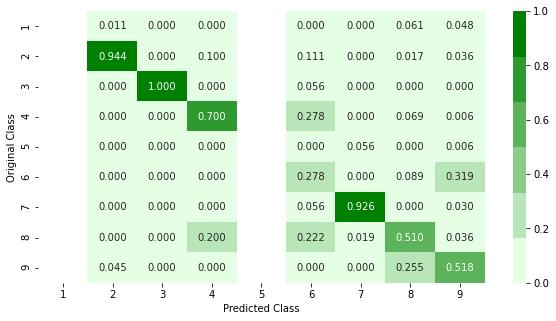

Sum of columns in precision matrix [nan  1.  1.  1. nan  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


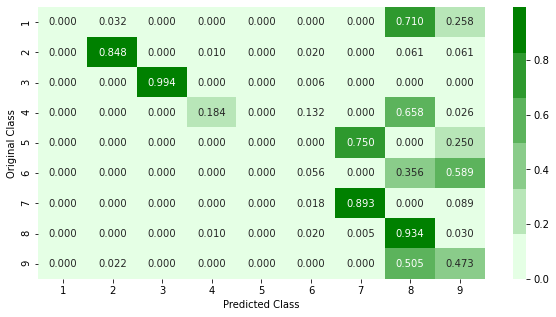

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [16]:

# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)
#------------------------------
# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------



alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3> 4.1.4. Random Forest Classifier </h3>

log_loss for c =  10 is 0.1460222975981047
log_loss for c =  50 is 0.12612713578071227
log_loss for c =  100 is 0.12173025227309305
log_loss for c =  500 is 0.11957752702967171
log_loss for c =  1000 is 0.11909095996796876
log_loss for c =  2000 is 0.11884152222926911
log_loss for c =  3000 is 0.11871563414450467


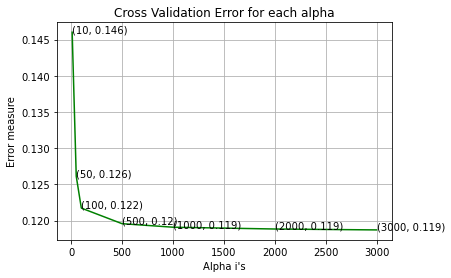

For values of best alpha =  3000 The train log loss is: 0.05048792870159994
For values of best alpha =  3000 The cross validation log loss is: 0.11871563414450467
For values of best alpha =  3000 The test log loss is: 0.12321133707384688
Number of misclassified points  3.0927835051546393
-------------------------------------------------- Confusion matrix --------------------------------------------------


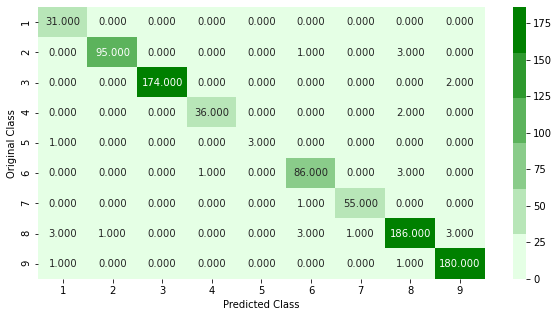

-------------------------------------------------- Precision matrix --------------------------------------------------


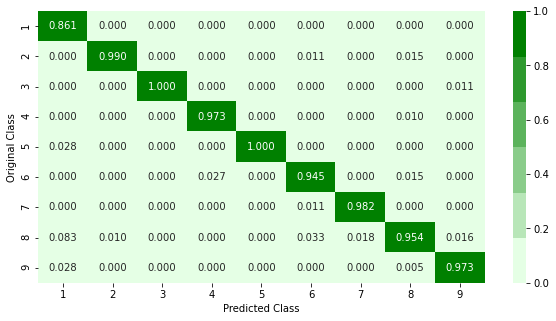

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


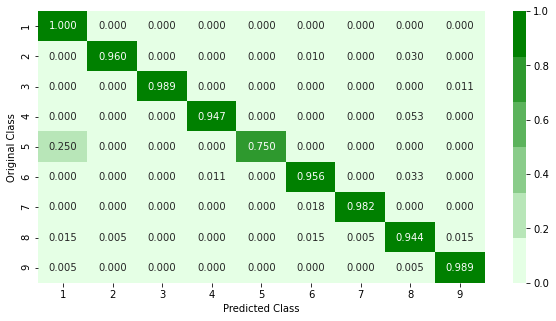

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [17]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------


alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification</h3>

log_loss for c =  10 is 0.1448811879385057
log_loss for c =  50 is 0.11243947653744427
log_loss for c =  100 is 0.10899269981066317
log_loss for c =  500 is 0.10831766691726437
log_loss for c =  1000 is 0.10825661419796484
log_loss for c =  2000 is 0.10832922216809475


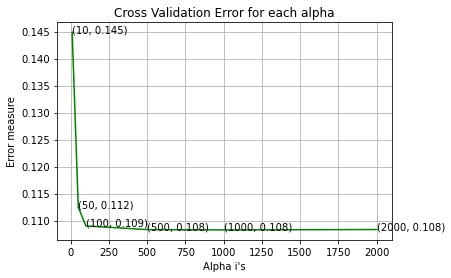

For values of best alpha =  1000 The train log loss is: 0.046650233347131254
For values of best alpha =  1000 The cross validation log loss is: 0.10825661419796484
For values of best alpha =  1000 The test log loss is: 0.09865407714299111
Number of misclassified points  2.290950744558992
-------------------------------------------------- Confusion matrix --------------------------------------------------


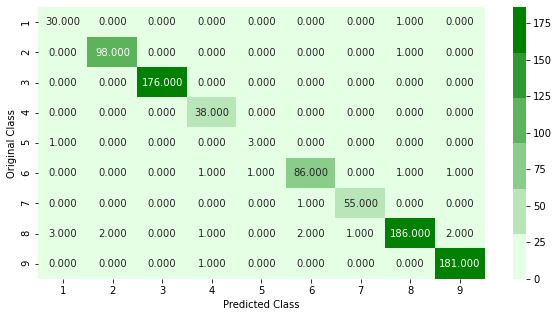

-------------------------------------------------- Precision matrix --------------------------------------------------


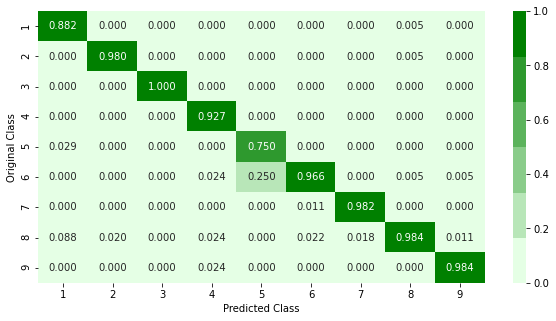

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


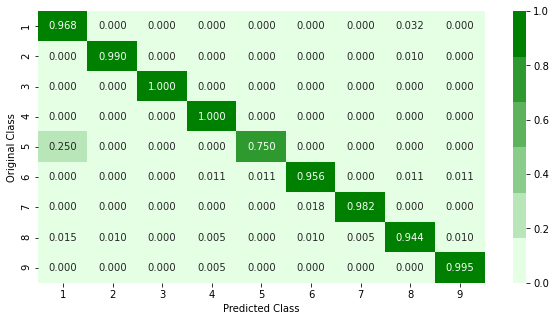

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [18]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data


# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------


alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.6. XgBoost Classification with best hyper parameters using RandomSearch </h3>

In [19]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 11.3min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 24.5min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 25.7min finished


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=No

In [20]:
print (random_cfl1.best_params_)

{'subsample': 0.5, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.15, 'colsample_bytree': 0.3}


In [22]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
x_cfl=XGBClassifier(n_estimators=2000, learning_rate=0.15, colsample_bytree=0.3, max_depth=3,subsample=0.5)
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))  

train loss 0.04326120605603212
cv loss 0.09590827029244955
test loss 0.10105530637349316


<h2> 4.2 Modeling with .asm files </h2>

<pre>
The asm files contains :
1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs


Here we extracted 52 features from all the asm files which are important.

We read the top solutions and handpicked the features from those papers/videos/blogs. 
 Refer:https://www.kaggle.com/c/malware-classification/discussion
            </pre>

In [24]:
Y=pd.read_csv("D:\data/trainLabels1.csv")
Y.Id=Y.Id+'.asm'
filenames=Y['Id'].tolist()
 
files=os.listdir(r'D:\data\asmFiles')  # checking all the files of original files

for file in files:
    if any(file == filename for filename in filenames):
        shutil.move(r"D:/data/asmFiles/"+ file,r"D:/data/asmFiles1")  # separating 10% data another file

<h3> 4.2.1 Feature extraction from asm files </h3>

In [34]:
#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html
#The prefixes tells about the segments that are present in the asm files
#There are 450 segments(approx) present in all asm files.
#this prefixes are best segments that gives us best values.
#https://en.wikipedia.org/wiki/Data_segment
prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
#this are opcodes that are used to get best results
#https://en.wikipedia.org/wiki/X86_instruction_listings

opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
#best keywords that are taken from different blogs
keywords = ['.dll','std::',':dword']
#Below taken registers are general purpose registers and special registers
#All the registers which are taken are best 
registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
len(prefixes)+len(opcodes)+len(keywords)+len(registers)

51

In [11]:
file1=open(r"D:\data\asm\3fgX5GuthkIcJaTvP9UN.txt","w+")
files = os.listdir(r"D:/data/asmFiles1")
for f in files:
    
    #filling the values with zeros into the arrays
    prefixescount=np.zeros(len(prefixes),dtype=int)
    opcodescount=np.zeros(len(opcodes),dtype=int)
    keywordcount=np.zeros(len(keywords),dtype=int)
    registerscount=np.zeros(len(registers),dtype=int)
    features=[]
    f2=f.split('.')[0]
    file1.write(f2+",")
    with codecs.open(r'D:/data/asmFiles1/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
    for prefix in prefixescount:
            file1.write(str(prefix)+",")
    for opcode in opcodescount:
            file1.write(str(opcode)+",")
    for register in registerscount:
            file1.write(str(register)+",")
    for key in keywordcount:
            file1.write(str(key)+",")
    file1.write("\n")
file1.close()

In [15]:
Y=pd.read_csv("D:\data/trainLabels1.csv") 
Y

,Id,Class
0,01kcPWA9K2BOxQeS5Rju,1
1,04EjIdbPV5e1XroFOpiN,1
2,05EeG39MTRrI6VY21DPd,1
3,05rJTUWYAKNegBk2wE8X,1
4,0AnoOZDNbPXIr2MRBSCJ,1
...,...,...
4358,iouyxgUJX7pjI1LBTSDF,9
4359,iPFa4r6moSNthpqB2RDV,9
4360,iPqeOav3fHD2VJrt9GoE,9
4361,iPtRTr5EZ4bQljzKXYcJ,9


In [35]:
dfasm=pd.read_csv(r"D:\data\asm\3fgX5GuthkIcJaTvP9UN.txt")
columns=['ID','HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE','jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx','.dll','std::',':dword','edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']

In [22]:
dfasm.columns

Index(['01azqd4InC7m9JpocGv5', '18', '22430', '0', '1158', '1366754', '0.1',
       '1794', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '730', '5295', '0.8',
       '3208', '542', '418', '290', '0.9', '648', '3', '5', '622', '82',
       '0.10', '197', '2', '672', '1533', '158', '0.11', '0.12', '0.13', '557',
       '0.14', '308', '0.15', '1490', '1891', '4371', '808', '2290', '1281',
       '587', '701', '0.16', '15', '14', '456', 'Unnamed: 52'],
      dtype='object')

In [44]:
a=['01azqd4InC7m9JpocGv5', 18, 22430, 0, 1158, 1366754, 0.1,
       1794, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 730, 5295, 0.8,
       3208, 542, 418, 290, 0.9, 648, 3, 5, 622, 82,
       0.10, 197, 2, 672, 1533, 158, 0.11, 0.12, 0.13, 557,
       0.14, 308, 0.15, 1490, 1891, 4371, 808, 2290, 1281,
       587, 701, 0.16, 15, 14, 456, 'Unnamed: 52']
df=pd.DataFrame(a).T
df.drop([52],axis=1, inplace=True)
df.columns=columns
df

,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,:dword,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip
0,01azqd4InC7m9JpocGv5,18,22430,0,1158,1366754,0.1,1794,0.2,0.3,...,4371,808,2290,1281,587,701,0.16,15,14,456


In [49]:
dfasm.drop(['Unnamed: 52'],axis=1, inplace=True)


In [50]:
dfasm.columns=columns
dfasm=df.append(dfasm)

In [51]:
dfasm

,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,:dword,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip
0,01azqd4InC7m9JpocGv5,18,22430,0,1158,1366754,0.1,1794,0.2,0.3,...,4371,808,2290,1281,587,701,0.16,15,14,456
0,01IsoiSMh5gxyDYTl4CB,0,109939,0,616,24568,0,26405,0,0,...,1446,260,1090,391,905,420,0,24,22,227
1,01jsnpXSAlgw6aPeDxrU,18,68883,0,304,662,0,1093,0,0,...,903,5,547,5,451,56,0,27,0,117
2,01kcPWA9K2BOxQeS5Rju,19,744,0,127,57,0,323,0,3,...,137,18,66,15,43,83,0,17,48,29
3,01SuzwMJEIXsK7A8dQbl,18,10368,0,206,4595,92,0,0,3,...,1220,18,1228,24,1546,107,0,15,0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,iouyxgUJX7pjI1LBTSDF,18,10061,0,1267,154954,0,1908,0,0,...,1484,375,382,552,610,125,0,27,12,478
4358,iPFa4r6moSNthpqB2RDV,20,11619,0,326,141356,0,442,0,0,...,2504,677,1030,974,712,179,0,10,0,80
4359,iPqeOav3fHD2VJrt9GoE,18,16836,0,1312,170941,0,2011,0,0,...,2712,681,801,957,953,186,0,24,12,507
4360,iPtRTr5EZ4bQljzKXYcJ,20,14205,0,380,1172287,0,490,0,0,...,3025,791,1526,1021,897,230,0,10,0,94


<h4> 4.2.1.1 Files sizes of each .asm file </h4>

In [53]:
#file sizes of byte files

files=os.listdir(r'D:/data/asmFiles1')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    
    statinfo=os.stat(r'D:/data/asmFiles1/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

                     ID       size  Class
0  01azqd4InC7m9JpocGv5  56.229886      9
1  01IsoiSMh5gxyDYTl4CB  13.999378      2
2  01jsnpXSAlgw6aPeDxrU   8.507785      9
3  01kcPWA9K2BOxQeS5Rju   0.078190      1
4  01SuzwMJEIXsK7A8dQbl   0.996723      8


<h4> 4.2.1.2 Distribution of .asm file sizes</h4>

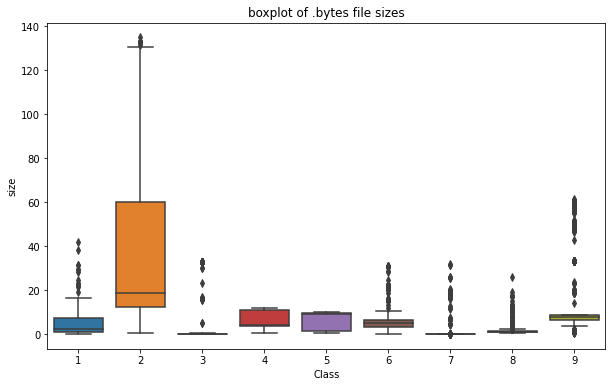

In [54]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [65]:
# add the file size feature to previous extracted features
print(dfasm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(dfasm, asm_size_byte,on='ID', how='left')
result_asm.head()

(4363, 52)
(4363, 3)


,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,esi,eax,ebx,ecx,edi,ebp,esp,eip,size,Class
0,01azqd4InC7m9JpocGv5,18,22430,0,1158,1366754,0.1,1794,0.2,0.3,...,2290,1281,587,701,0.16,15,14,456,56.229886,9
1,01IsoiSMh5gxyDYTl4CB,0,109939,0,616,24568,0,26405,0,0,...,1090,391,905,420,0,24,22,227,13.999378,2
2,01jsnpXSAlgw6aPeDxrU,18,68883,0,304,662,0,1093,0,0,...,547,5,451,56,0,27,0,117,8.507785,9
3,01kcPWA9K2BOxQeS5Rju,19,744,0,127,57,0,323,0,3,...,66,15,43,83,0,17,48,29,0.078190,1
4,01SuzwMJEIXsK7A8dQbl,18,10368,0,206,4595,92,0,0,3,...,1228,24,1546,107,0,15,0,76,0.996723,8


In [66]:
# we normalize the data each column 
result_asm = normalize(result_asm)
result_asm.head()

,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,esi,eax,ebx,ecx,edi,ebp,esp,eip,size,Class
0,01azqd4InC7m9JpocGv5,0.101695,0.0329276,0,0.00693691,0.543192,1.39587e-05,0.000468289,5.72738e-05,1.9755e-05,...,0.0258757,0.0284667,0.00491012,0.0101675,0.00457143,0.0757576,0.000593421,0.122713,0.416537,9
1,01IsoiSMh5gxyDYTl4CB,0,0.161392,0,0.0036901,0.00976411,0,0.00689251,0,0,...,0.0123164,0.00868889,0.00757012,0.00609181,0,0.121212,0.000932519,0.0610872,0.103606,2
2,01jsnpXSAlgw6aPeDxrU,0.101695,0.101121,0,0.00182109,0.0002631,0,0.000285306,0,0,...,0.00618079,0.000111111,0.00377251,0.000812242,0,0.136364,0,0.0314855,0.062913,9
3,01kcPWA9K2BOxQeS5Rju,0.107345,0.0010922,0,0.000760784,2.26536e-05,0,8.43129e-05,0,0.00019755,...,0.000745763,0.000333333,0.000359685,0.00120386,0,0.0858586,0.00203459,0.00780409,0.000449,1
4,01SuzwMJEIXsK7A8dQbl,0.101695,0.0152204,0,0.00123403,0.0018262,0.012842,0,0,0.00019755,...,0.0138757,0.000533333,0.0129319,0.00155196,0,0.0757576,0,0.0204521,0.007256,8


In [79]:
data_y = result_asm['Class']


<h3> 4.2.2 Univariate analysis on  asm file features</h3>

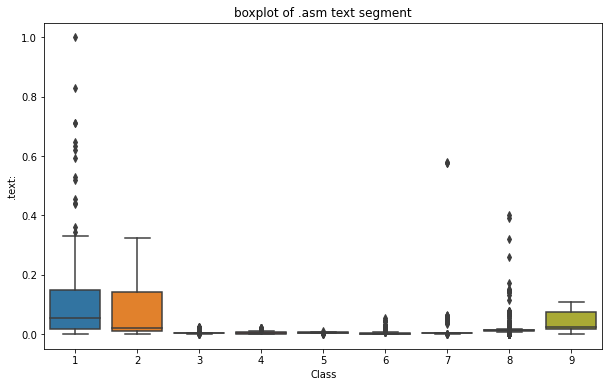

In [67]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Class", y=".text:", data=result_asm)
plt.title("boxplot of .asm text segment")
plt.show()

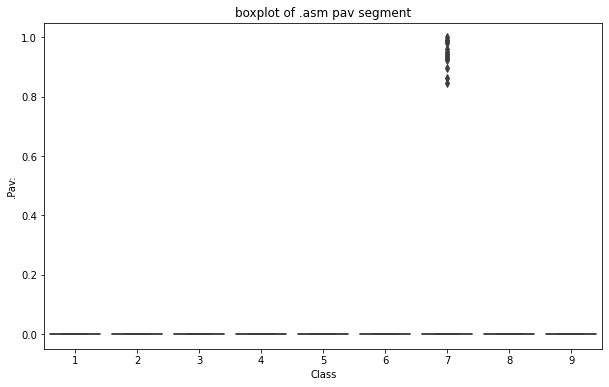

In [68]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm pav segment")
plt.show()

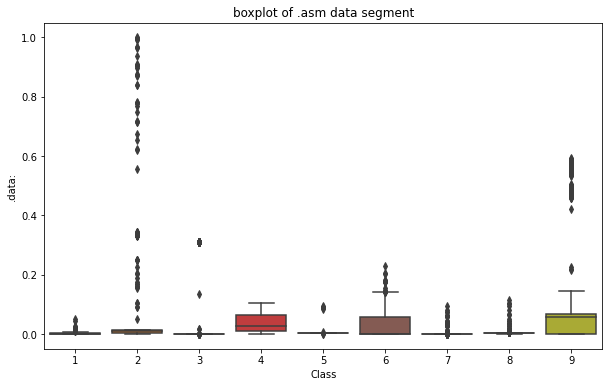

In [71]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Class", y=".data:", data=result_asm)
plt.title("boxplot of .asm data segment")
plt.show()

<pre>
The plot is between data segment and class label 
class 4,6 and class 9 can be easily separated from given points
</pre>

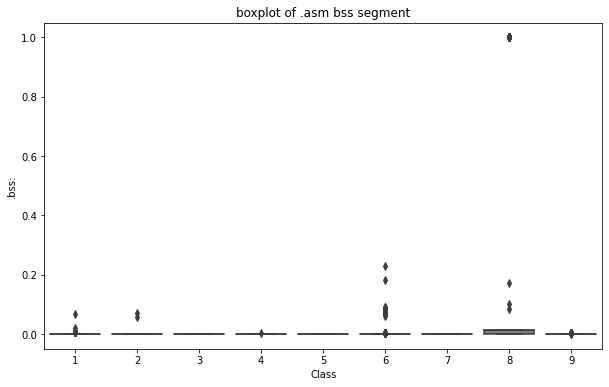

In [72]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm bss segment")
plt.show()

<pre>
plot between bss segment and class label
very less number of files are having bss segment
</pre>

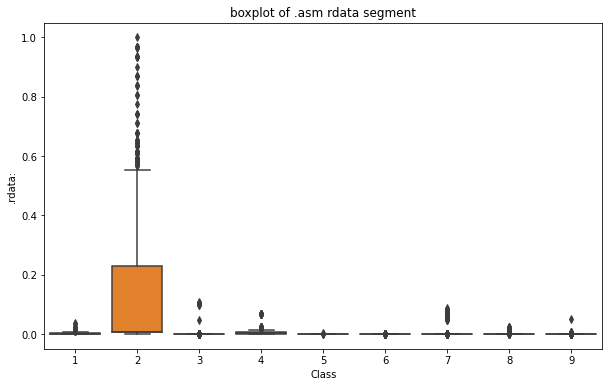

In [73]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm rdata segment")
plt.show()

<pre>
Plot between rdata segment and Class segment
Class 2 can be easily separated 75 pecentile files are having 1M rdata lines
</pre>

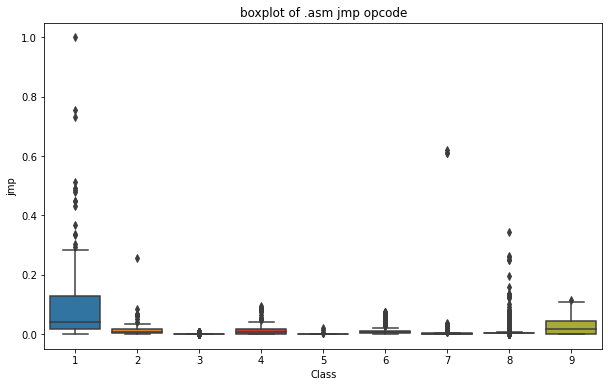

In [74]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Class", y="jmp", data=result_asm)
plt.title("boxplot of .asm jmp opcode")
plt.show()

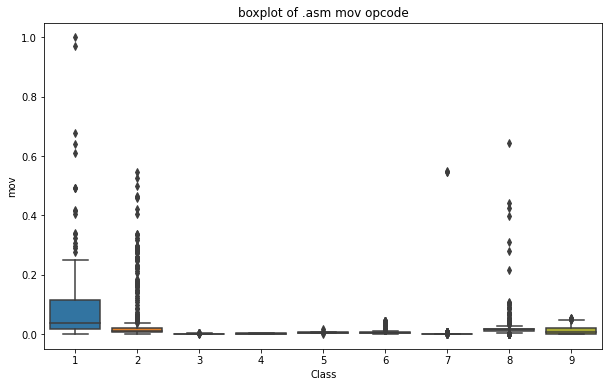

In [75]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Class", y="mov", data=result_asm)
plt.title("boxplot of .asm mov opcode")
plt.show()

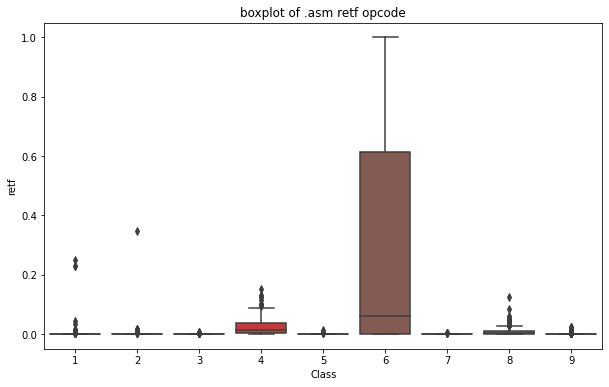

In [76]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Class", y="retf", data=result_asm)
plt.title("boxplot of .asm retf opcode")
plt.show()

<pre>
plot between Class label and retf
Class 6 can be easily separated with opcode retf

</pre>

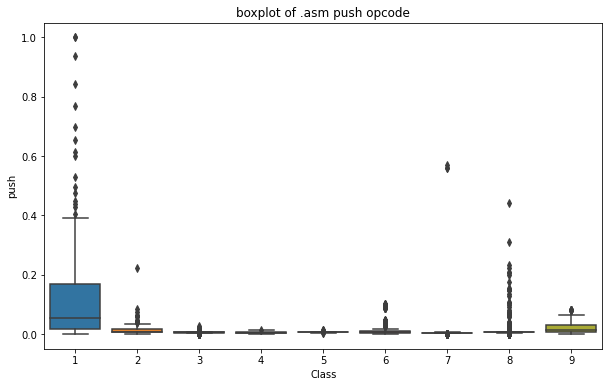

In [77]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Class", y="push", data=result_asm)
plt.title("boxplot of .asm push opcode")
plt.show()

<h3> 4.2.2 Multivariate Analysis on .asm file features </h3>

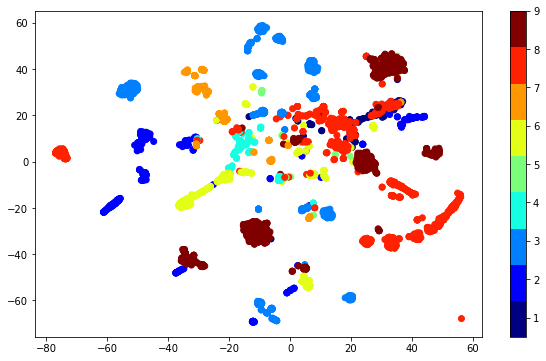

In [80]:
plt.figure(figsize=(10, 6))
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_asm.drop(['ID','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

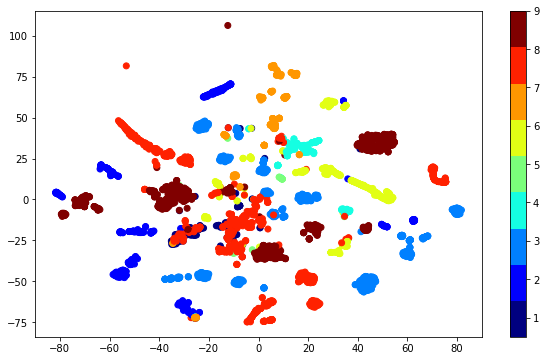

In [81]:
plt.figure(figsize=(10, 6))
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_asm.drop(['ID','Class', 'rtn', '.BSS:', '.CODE','size'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<h3> 4.2.3 Conclusion on EDA</h3>

<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways
<ul>

<li>Each feature has its unique importance in separating the Class labels.</li>
</ul>
</li>
</p>

<h2> 4.3 Train and test split</h2>

In [84]:
asm_y = result_asm['Class']
asm_x = result_asm.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)

In [85]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [86]:
print( X_cv_asm.isnull().all())

HEADER:    False
.text:     False
.Pav:      False
.idata:    False
.data:     False
.bss:      False
.rdata:    False
.edata:    False
.rsrc:     False
.tls:      False
.reloc:    False
jmp        False
mov        False
retf       False
push       False
pop        False
xor        False
retn       False
nop        False
sub        False
inc        False
dec        False
add        False
imul       False
xchg       False
or         False
shr        False
cmp        False
call       False
shl        False
ror        False
rol        False
jnb        False
jz         False
lea        False
movzx      False
.dll       False
std::      False
:dword     False
edx        False
esi        False
eax        False
ebx        False
ecx        False
edi        False
ebp        False
esp        False
eip        False
size       False
dtype: bool


<h2> 4.4. Machine Learning models on features of .asm files</h2>

log_loss for k =  1 is 0.15717109827820874
log_loss for k =  3 is 0.149878031115048
log_loss for k =  5 is 0.16202270415363593
log_loss for k =  7 is 0.1792335141373571
log_loss for k =  9 is 0.19645094130856794
log_loss for k =  11 is 0.20531405668437272
log_loss for k =  13 is 0.21684705148179662
log_loss for k =  15 is 0.2277340316084174
log_loss for k =  17 is 0.23804031032966202
log_loss for k =  19 is 0.24841890855559712


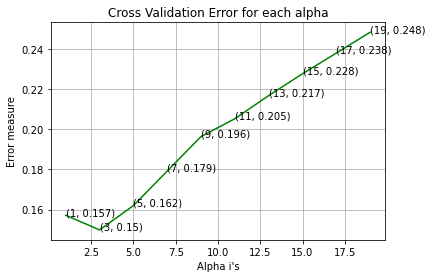

log loss for train data 0.09189500695850177
log loss for cv data 0.149878031115048
log loss for test data 0.1362516166867655
Number of misclassified points  3.0927835051546393
-------------------------------------------------- Confusion matrix --------------------------------------------------


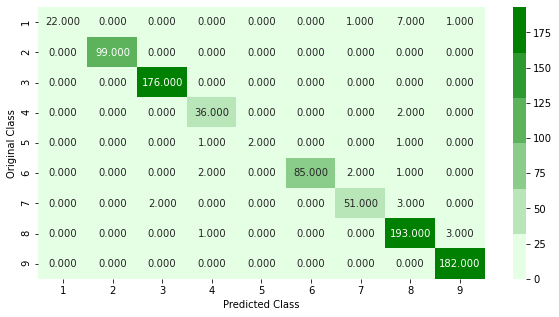

-------------------------------------------------- Precision matrix --------------------------------------------------


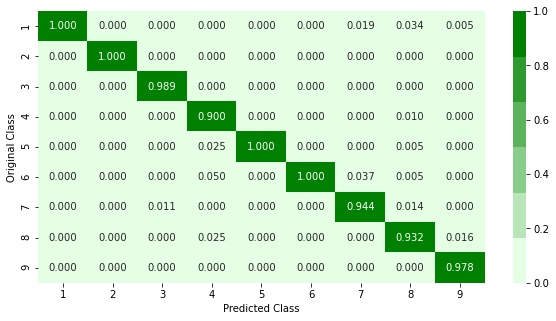

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


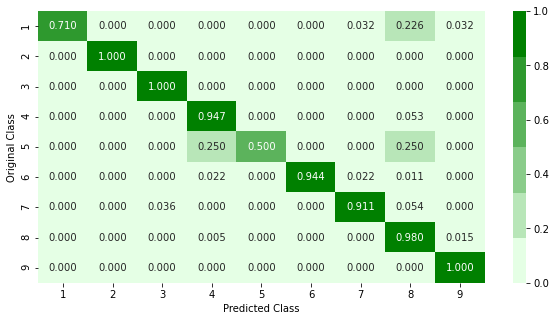

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [89]:
alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.2 Logistic Regression </h3>

log_loss for c =  1e-05 is 1.2830553237919269
log_loss for c =  0.0001 is 1.2828057513788227
log_loss for c =  0.001 is 1.2808591844760215
log_loss for c =  0.01 is 1.2549646724761425
log_loss for c =  0.1 is 1.1050197224037739
log_loss for c =  1 is 1.0823133006565413
log_loss for c =  10 is 1.166151011844235
log_loss for c =  100 is 1.205344379541097
log_loss for c =  1000 is 1.2145535431503405


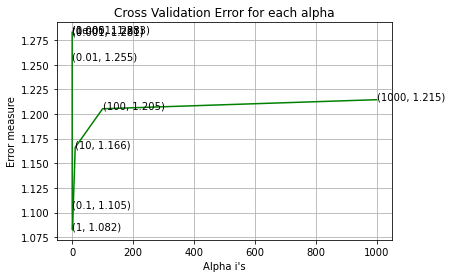

log loss for train data 1.0665932050060956
log loss for cv data 1.0823133006565413
log loss for test data 1.0640837947915407
Number of misclassified points  29.896907216494846
-------------------------------------------------- Confusion matrix --------------------------------------------------


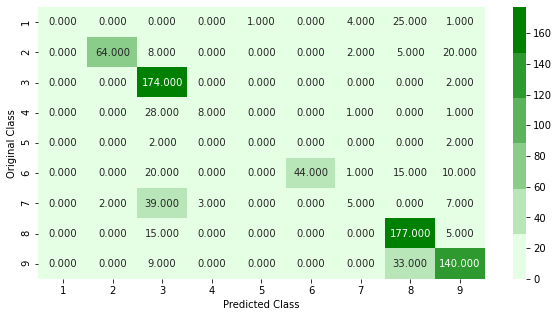

-------------------------------------------------- Precision matrix --------------------------------------------------


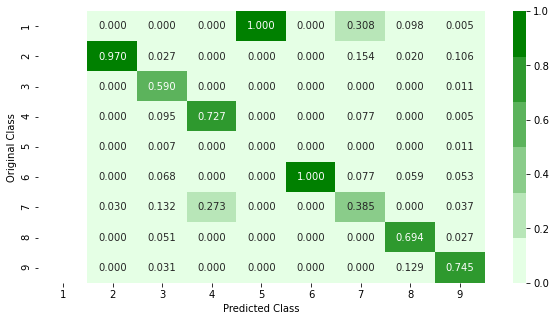

Sum of columns in precision matrix [nan  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


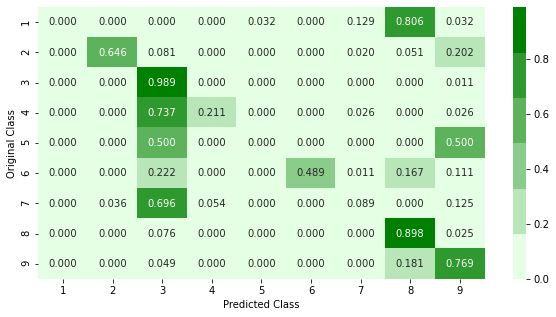

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [91]:
alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.3 Random Forest Classifier</h3>

log_loss for c =  10 is 0.08102351788921885
log_loss for c =  50 is 0.06644076711349453
log_loss for c =  100 is 0.06551894274191944
log_loss for c =  500 is 0.0654137766806789
log_loss for c =  1000 is 0.06503208578476431
log_loss for c =  2000 is 0.06479910771134499
log_loss for c =  3000 is 0.06478839731478905


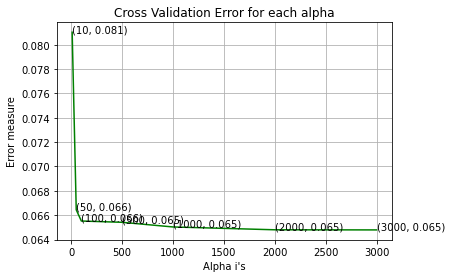

log loss for train data 0.035048947512110885
log loss for cv data 0.06478839731478905
log loss for test data 0.08858632675431417
Number of misclassified points  1.718213058419244
-------------------------------------------------- Confusion matrix --------------------------------------------------


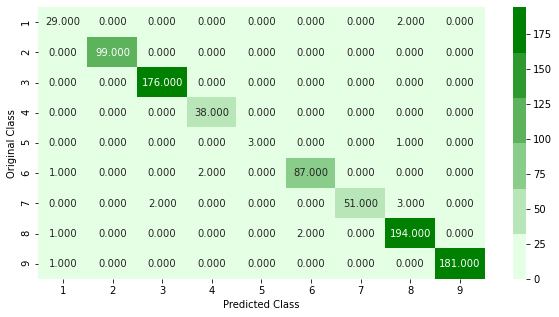

-------------------------------------------------- Precision matrix --------------------------------------------------


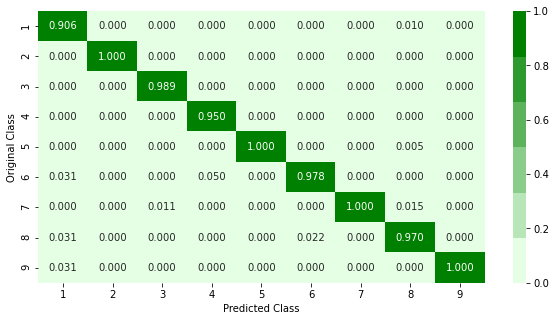

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


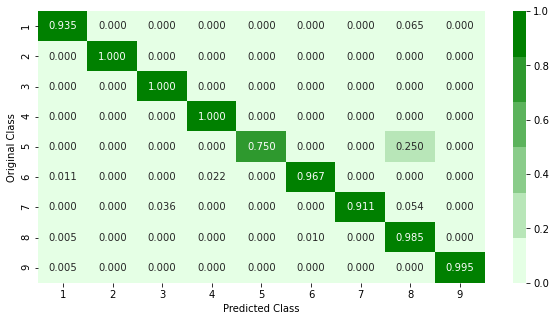

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [92]:
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.4 XgBoost Classifier</h3>

In [96]:
X_train_asm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2792 entries, 50 to 3816
Data columns (total 49 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   HEADER:  2792 non-null   object 
 1   .text:   2792 non-null   object 
 2   .Pav:    2792 non-null   object 
 3   .idata:  2792 non-null   object 
 4   .data:   2792 non-null   object 
 5   .bss:    2792 non-null   object 
 6   .rdata:  2792 non-null   object 
 7   .edata:  2792 non-null   object 
 8   .rsrc:   2792 non-null   object 
 9   .tls:    2792 non-null   object 
 10  .reloc:  2792 non-null   object 
 11  jmp      2792 non-null   object 
 12  mov      2792 non-null   object 
 13  retf     2792 non-null   object 
 14  push     2792 non-null   object 
 15  pop      2792 non-null   object 
 16  xor      2792 non-null   object 
 17  retn     2792 non-null   object 
 18  nop      2792 non-null   object 
 19  sub      2792 non-null   object 
 20  inc      2792 non-null   object 
 21  dec      2792

In [99]:
X_train_asm.columns

Index(['HEADER:', '.text:', '.Pav:', '.idata:', '.data:', '.bss:', '.rdata:',
       '.edata:', '.rsrc:', '.tls:', '.reloc:', 'jmp', 'mov', 'retf', 'push',
       'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add', 'imul', 'xchg',
       'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb', 'jz', 'lea',
       'movzx', '.dll', 'std::', ':dword', 'edx', 'esi', 'eax', 'ebx', 'ecx',
       'edi', 'ebp', 'esp', 'eip', 'size'],
      dtype='object')

In [101]:
X_train_asm=X_train_asm.astype(int)

log_loss for c =  10 is 1.8937042446485972
log_loss for c =  50 is 1.8937139651696493
log_loss for c =  100 is 1.8937136119439182
log_loss for c =  500 is 1.893713712457413
log_loss for c =  1000 is 1.893713944762514
log_loss for c =  2000 is 1.8937141188845033
log_loss for c =  3000 is 1.8937140220000819


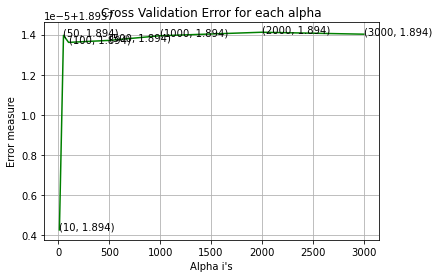

For values of best alpha =  10 The train log loss is: 1.890635539693902
For values of best alpha =  10 The cross validation log loss is: 1.8937042446485972
For values of best alpha =  10 The test log loss is: 1.8934358579010433
Number of misclassified points  77.20504009163804
-------------------------------------------------- Confusion matrix --------------------------------------------------


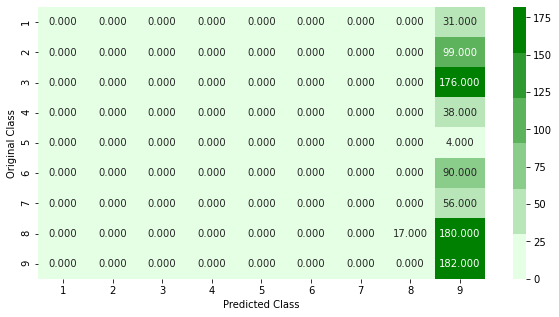

-------------------------------------------------- Precision matrix --------------------------------------------------


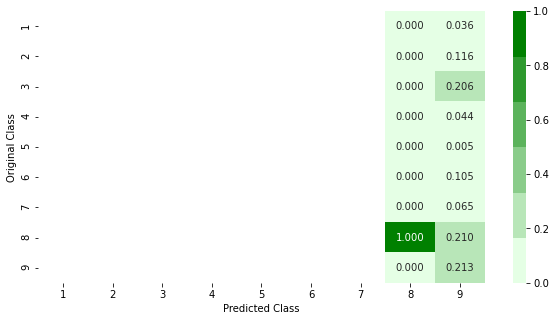

Sum of columns in precision matrix [nan nan nan nan nan nan nan  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


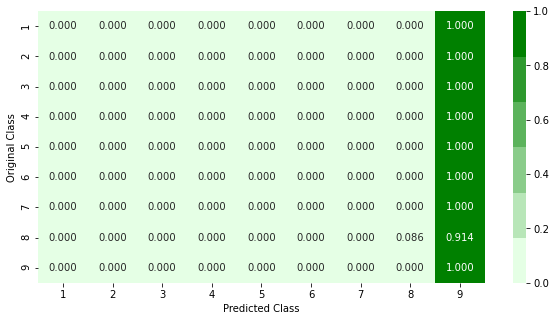

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [102]:

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.5 Xgboost Classifier with best hyperparameters</h3>

In [103]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_asm,y_train_asm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  1.0min remaining:   13.4s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  1.2min remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=No

In [104]:
print (random_cfl.best_params_)

{'subsample': 0.3, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.15, 'colsample_bytree': 0.3}


In [105]:
x_cfl=XGBClassifier(n_estimators=1000,subsample=0.3,learning_rate=0.15,colsample_bytree=0.3,max_depth=5)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

train loss 1.8906511121875933
cv loss 1.8937141884313682
test loss 1.8934477722645495


<h2> 4.5. Machine Learning models on features of both .asm and .bytes files</h2>

<h3> 4.5.1. Merging both asm and byte file features</h3>

In [133]:
result_x = pd.merge(result,result_asm.drop(['Class'], axis=1),on='ID', how='left')
result_y = result_x['Class']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class'], axis=1)
result_x.head()

,0,1,2,3,4,5,6,7,8,9,...,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip,size_y
0,0.106411,0.025217,0.002541,0.004668,0.005454,0.005274,0.005077,0.005555,0.020524,0.002706,...,0.000118816,0.00618079,0.000111111,0.00377251,0.000812242,0,0.136364,0,0.0314855,0.062913
1,0.023948,0.003080,0.000707,0.001539,0.000760,0.000347,0.000309,0.001239,0.002410,0.000520,...,0.000427736,0.000745763,0.000333333,0.000359685,0.00120386,0,0.0858586,0.00203459,0.00780409,0.000449
2,0.022437,0.001744,0.000285,0.000797,0.000332,0.000225,0.000147,0.000588,0.000930,0.000245,...,0.000427736,0.0138757,0.000533333,0.0129319,0.00155196,0,0.0757576,0,0.0204521,0.007256
3,0.096828,0.000957,0.000323,0.000600,0.000204,0.000177,0.000170,0.000707,0.000715,0.000400,...,0.000689131,0.000124294,0.0002,5.85534e-05,0.000217565,0,0.030303,0,0.00376749,0.024301
4,0.055060,0.058817,0.013743,0.027503,0.151553,0.008522,0.007358,0.030880,0.024375,0.000242,...,0.00349318,0.0039887,0.00373333,0.00313679,0.000913772,0,0.111111,0,0.0635091,0.126384


<h3> 4.5.2. Multivariate Analysis on final fearures</h3>

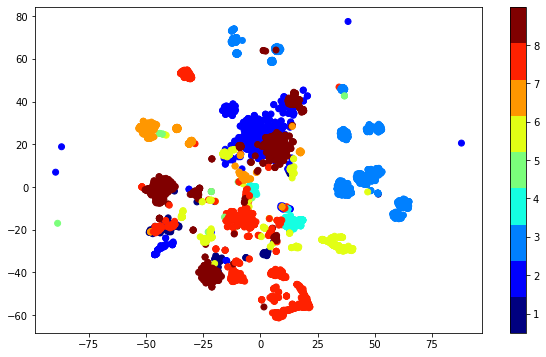

In [137]:
plt.figure(figsize=(10, 6))
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_x)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

<h3> 4.5.3. Train and Test split</h3>

In [138]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3> 4.5.4. Random Forest Classifier on final features</h3>

log_loss for c =  10 is 0.09962145710991989
log_loss for c =  50 is 0.10235162330098928
log_loss for c =  100 is 0.09846129441593005
log_loss for c =  500 is 0.0970995667447997
log_loss for c =  1000 is 0.09685031766302103
log_loss for c =  2000 is 0.0965000152597152
log_loss for c =  3000 is 0.09637224950059844


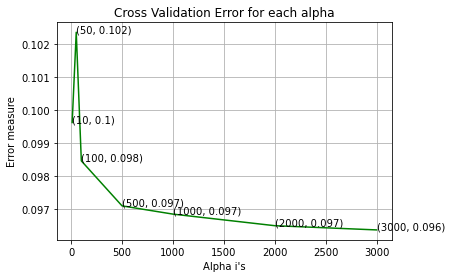

For values of best alpha =  3000 The train log loss is: 0.035111399723406454
For values of best alpha =  3000 The cross validation log loss is: 0.09637224950059844
For values of best alpha =  3000 The test log loss is: 0.07525849023523126
Number of misclassified points  83.73424971363116
-------------------------------------------------- Confusion matrix --------------------------------------------------


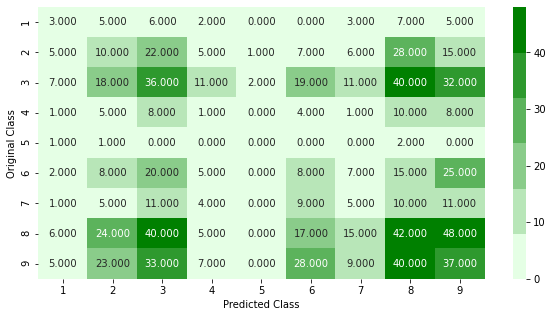

-------------------------------------------------- Precision matrix --------------------------------------------------


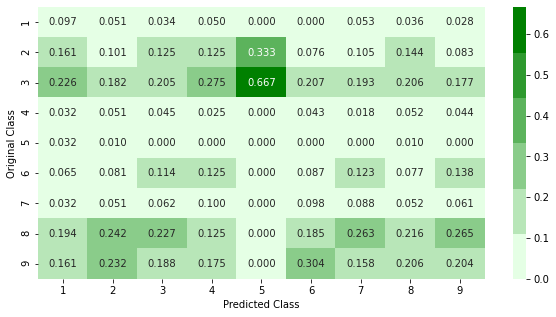

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


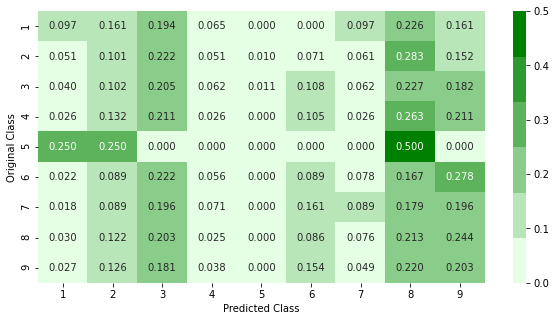

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [146]:
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_merge))

<h3> 4.5.5. XgBoost Classifier on final features</h3>

log_loss for c =  10 is 0.10634588544416768
log_loss for c =  50 is 0.08082189123024336
log_loss for c =  100 is 0.07846854956789939
log_loss for c =  500 is 0.07652088688353989
log_loss for c =  1000 is 0.07652109273435856
log_loss for c =  2000 is 0.07652082393619142
log_loss for c =  3000 is 0.07652165657065577


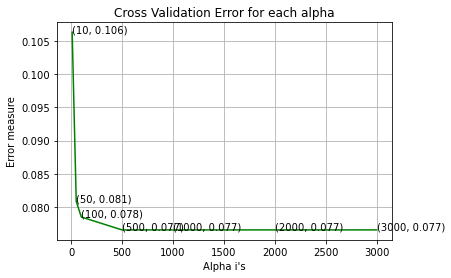

For values of best alpha =  2000 The train log loss is: 0.02938714473686028
For values of best alpha =  2000 The cross validation log loss is: 0.07652165657065577
For values of best alpha =  2000 The test log loss is: 0.04753529002085515


In [142]:
X_train_merge=X_train_merge.astype(float)
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=3000,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))


<h3> 4.5.5. XgBoost Classifier on final features with best hyper parameters using Random search</h3>

In [143]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  5.3min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  6.1min remaining:   23.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.1min finished


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=No

In [144]:
print (random_cfl.best_params_)

{'subsample': 0.3, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.5}


For values of best alpha =  2000 The train log loss is: 0.02741000999300234
For values of best alpha =  2000 The cross validation log loss is: 0.06472532156666472
For values of best alpha =  2000 The test log loss is: 0.04747535295401901
Number of misclassified points  83.61970217640321
-------------------------------------------------- Confusion matrix --------------------------------------------------


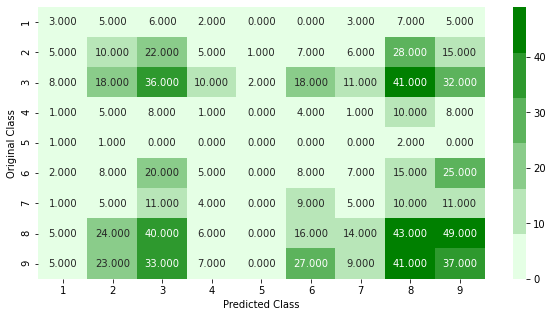

-------------------------------------------------- Precision matrix --------------------------------------------------


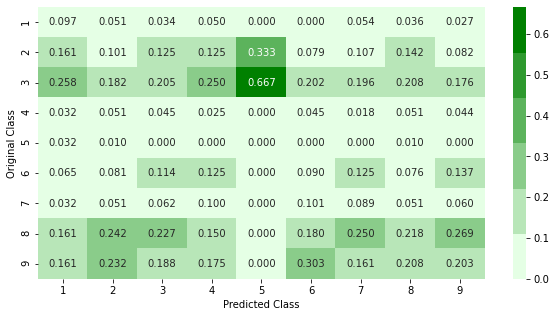

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


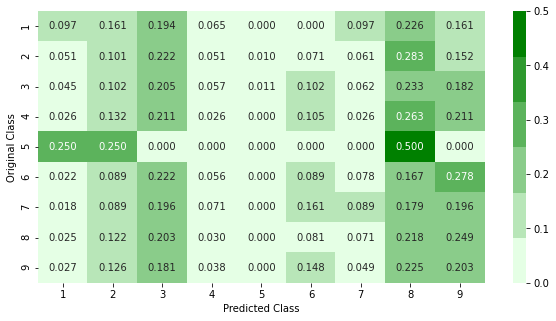

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [145]:
x_cfl=XGBClassifier(n_estimators=1000,max_depth=3,learning_rate=0.1,colsample_bytree=0.5,subsample=0.3,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_merge))